*This* notebook contains code used to create figures in the powerpoint presentation, 8810-ML4BA-meeting-12-clustering.pptx

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


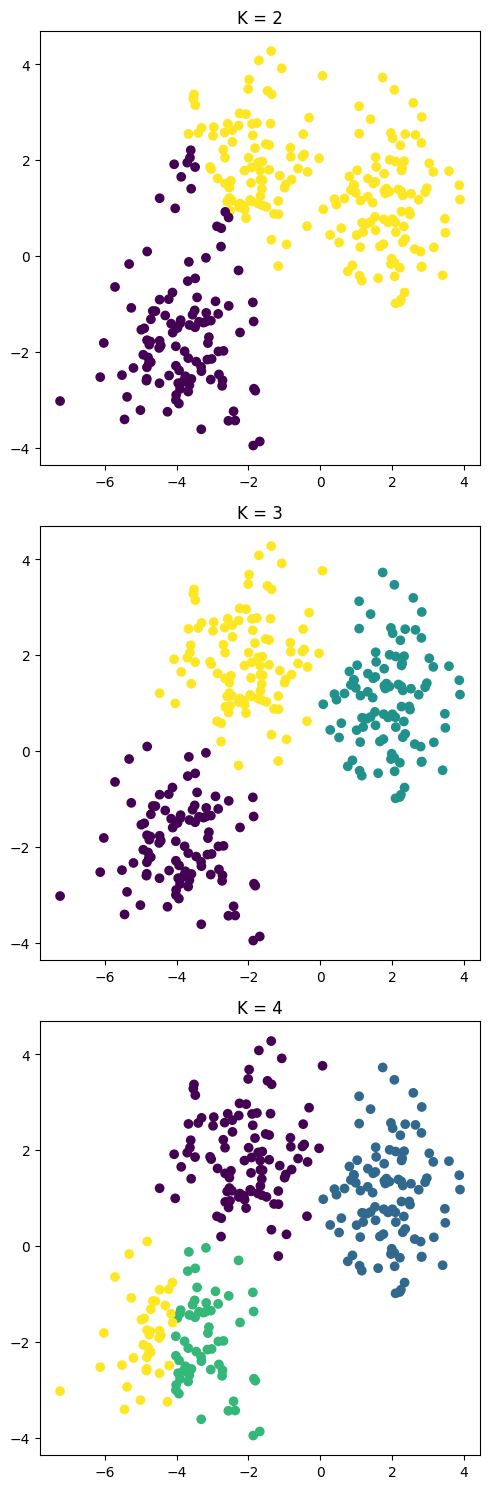

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate a simulated dataset with 2 features and 3 clusters
centers =  [[2, 1], [-4, -2], [-2, 2]]
X, _ = make_blobs(n_samples=300, centers=centers, n_features=2, random_state=42)

# Step 2: Apply K-means clustering with K = 2, 3, 4
k_values = [2, 3, 4]
clusters = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_values]

# Step 3: Create a subplot with a scatter plot of the results for each value of K
fig, axs = plt.subplots(len(k_values),1, figsize=(5,15), sharey=True)
for i, k in enumerate(k_values):
    axs[i].scatter(X[:, 0], X[:, 1], c=clusters[i].labels_, cmap='viridis')
    axs[i].set_title(f'K = {k}')

plt.tight_layout()
plt.show()


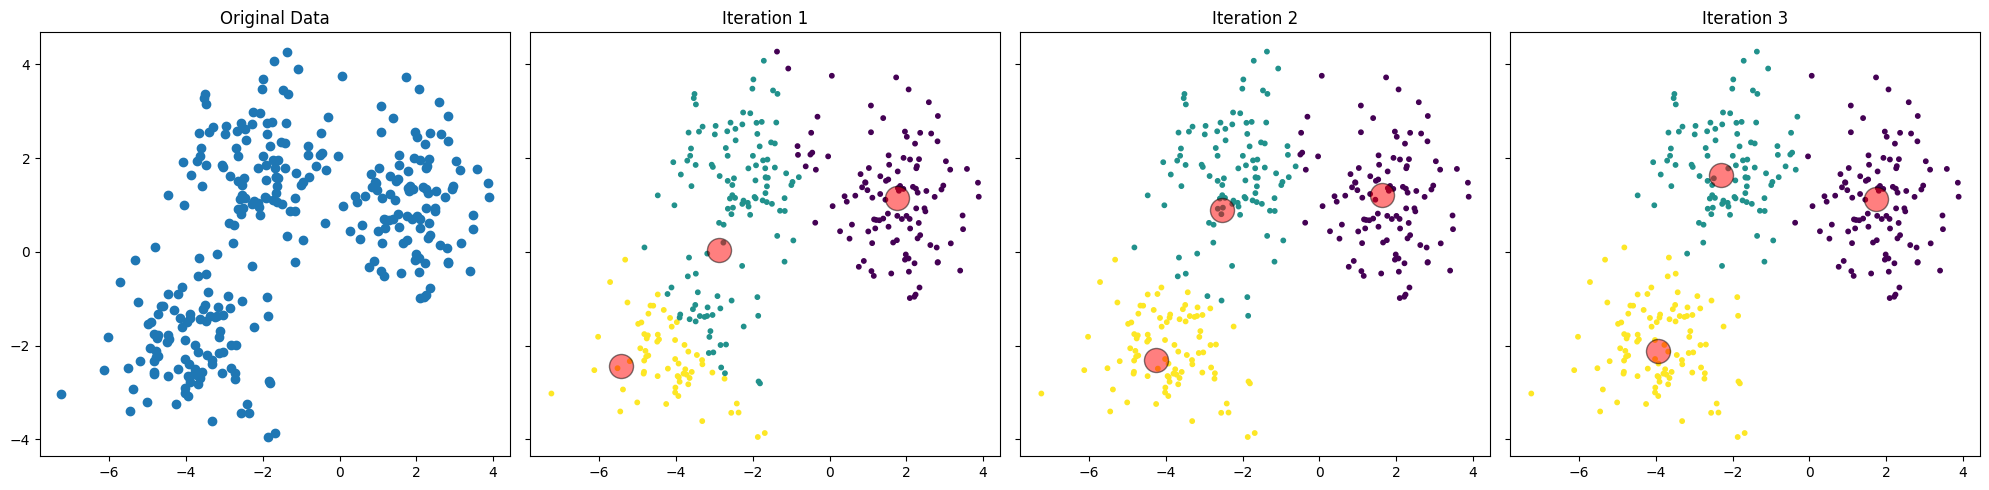

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Function to run K-means and capture centroids at specific iterations
def kmeans_iter(X, n_clusters=3, iterations=[2, 3, 4]):
    centroids = []
    labels = []
    kmeans = KMeans(n_clusters=n_clusters, max_iter=0, init='random', n_init=1, random_state=42)

    for i in iterations:
        kmeans.max_iter = i  # Increment max_iter for each iteration
        kmeans.fit(X)

        centroids.append(kmeans.cluster_centers_)
        labels.append(kmeans.labels_)

    return centroids, labels

# Generate a simulated dataset with 2 features and 3 clusters
centers =  [[2, 1], [-4, -2], [-2, 2]]
X, y = make_blobs(n_samples=300, centers=centers, n_features=2, random_state=42)

# Apply K-means clustering with K = 3 and capture centroids for iterations 2, 3, 4
centroids, labels = kmeans_iter(X, n_clusters=3, iterations=[1, 2, 3])

# Create a subplot with 4 plots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# First plot: scatter plot of the simulated data
axs[0].scatter(X[:, 0], X[:, 1], )
axs[0].set_title('Original Data')

# Second through fourth plots: centroid locations for iterations 2, 3, 4
for i in range(3):
    axs[i+1].scatter(X[:, 0], X[:, 1], c=labels[i], cmap='viridis', s=10)
    axs[i+1].scatter(centroids[i][:, 0], centroids[i][:, 1], c='red', s=300, alpha=0.5, edgecolor='black')
    axs[i+1].set_title(f'Iteration {i+1}')

plt.tight_layout()
plt.show()


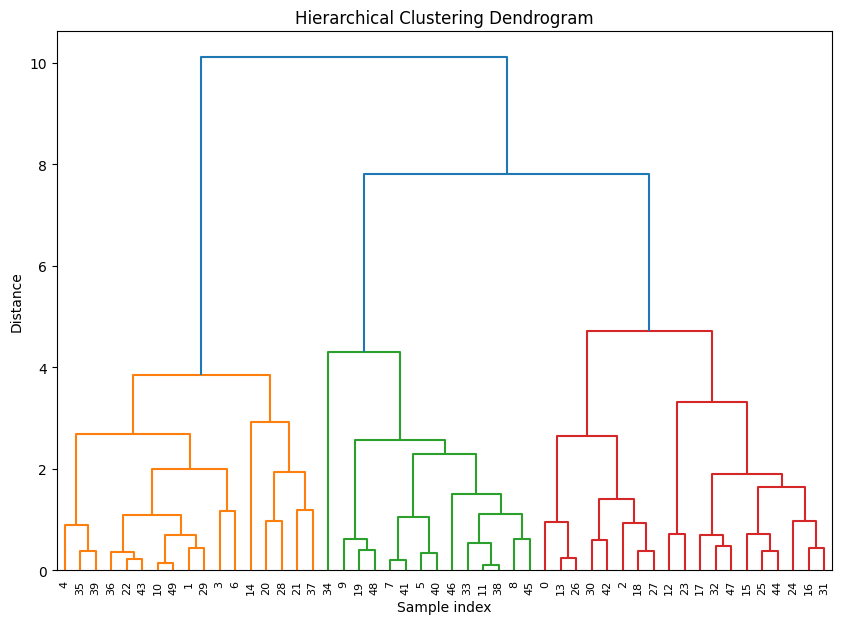

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Step 1: Generate simulated data with 5 features, 3 clusters, and 50 samples
centers =  [[2, 1], [-4, -2], [-2, 2]]
X, _ = make_blobs(n_samples=50, centers=centers, n_features=5, random_state=42)

# Step 2: Apply hierarchical clustering using Euclidean distance
Z = linkage(X, 'complete')

# Step 3: Plot a dendrogram of the results
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
